<a href="https://colab.research.google.com/github/GyanendraChaubey/Intrusion-Detection/blob/main/Rec_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the data
data=pd.read_csv("/content/drive/My Drive/Rec.csv")

In [4]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [5]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23419 entries, 0 to 23418
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pkSeqID            23419 non-null  int64  
 1   proto              23419 non-null  object 
 2   saddr              23419 non-null  object 
 3   sport              23419 non-null  int64  
 4   daddr              23419 non-null  object 
 5   dport              23419 non-null  int64  
 6   seq                23419 non-null  int64  
 7   stddev             23419 non-null  float64
 8   N_IN_Conn_P_SrcIP  23419 non-null  int64  
 9   min                23419 non-null  float64
 10  state_number       23419 non-null  int64  
 11  mean               23419 non-null  float64
 12  N_IN_Conn_P_DstIP  23419 non-null  int64  
 13  drate              23419 non-null  float64
 14  srate              23419 non-null  float64
 15  max                23419 non-null  float64
 16  attack             234

In [7]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3591126,tcp,192.168.100.150,45115,192.168.100.7,3031,13913,0.0,100,0.000423,1,0.000423,100,0.000000,0.000000,0.000423,1,Reconnaissance,OS_Fingerprint
1,3664695,tcp,192.168.100.150,61890,192.168.100.5,9502,5431,0.0,98,0.000781,1,0.000781,100,0.000000,0.000000,0.000781,1,Reconnaissance,Service_Scan
2,3626816,tcp,192.168.100.147,1822,192.168.100.3,916,3030,0.0,100,0.004917,1,0.004917,100,406.752075,203.376038,0.004917,1,Reconnaissance,Service_Scan
3,3664169,tcp,192.168.100.149,33626,192.168.100.5,9000,4900,0.0,100,0.002834,1,0.002834,100,0.000000,0.000000,0.002834,1,Reconnaissance,Service_Scan
4,3630606,tcp,192.168.100.149,1216,192.168.100.3,400,6924,0.0,100,0.005377,1,0.005377,100,185.977310,185.977310,0.005377,1,Reconnaissance,Service_Scan


In [8]:
data['proto'].unique()

array(['tcp', 'udp', 'arp', 'ipv6-icmp'], dtype=object)

In [9]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.147', '192.168.100.149',
       '192.168.100.148', '192.168.100.5', '192.168.100.3',
       '192.168.100.27', '192.168.100.6', 'fe80::250:56ff:febe:254',
       'fe80::250:56ff:febe:e9d9', '192.168.100.46', '192.168.100.7',
       'fe80::250:56ff:febe:26db', '192.168.100.1',
       'fe80::250:56ff:febe:89ee', '192.168.100.4'], dtype=object)

In [10]:
data['daddr'].unique()

array(['192.168.100.7', '192.168.100.5', '192.168.100.3', '192.168.100.6',
       '192.168.217.2', '192.168.100.147', '192.168.100.55',
       '192.168.100.150', '192.168.100.148', '255.255.255.255',
       '192.168.100.149', '96.7.49.66', '205.251.197.206',
       '192.168.100.1', '205.251.194.201', '224.0.0.251',
       '205.251.196.32', '52.201.147.106', '192.5.5.241', '192.55.83.30',
       '192.31.80.30', '8.8.8.8', '13.55.154.73', 'ff02::2',
       '192.41.162.30', '129.250.35.250', 'ff02::fb', '27.124.125.250',
       '199.19.56.1', '192.33.14.30', '205.251.199.148', '192.58.128.30',
       '192.12.94.30', '205.251.196.160', '205.251.199.194',
       '192.36.148.17', '184.85.248.65', '192.33.4.12', '52.11.124.117',
       '192.168.100.255', '192.54.112.30', 'ff02::1', '172.217.25.170',
       '205.251.194.102', '192.112.36.4', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [11]:
data.describe()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.341900e+04,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,3.621989e+06,38620.172552,9849.895683,12768.842265,0.002839,67.148042,0.027755,1.962509,0.031258,91.631282,20.018188,134.211233,0.034275,0.994961
std,2.649237e+04,18775.078213,15236.069796,9492.651341,0.064179,37.128852,0.141771,1.648674,0.170074,17.557197,448.595018,7079.100313,0.206750,0.070806
min,3.576885e+06,-1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.597843e+06,34141.000000,749.000000,4615.000000,0.000000,25.000000,0.000063,1.000000,0.000064,99.000000,0.000000,0.000000,0.000064,1.000000
50%,3.622267e+06,41840.000000,3300.000000,10802.000000,0.000000,99.000000,0.000205,1.000000,0.000209,100.000000,0.000000,0.000000,0.000210,1.000000
75%,3.645264e+06,51581.000000,9618.000000,19590.500000,0.000000,100.000000,0.001779,4.000000,0.002374,100.000000,0.000000,0.000000,0.002541,1.000000
max,3.668438e+06,64680.000000,65535.000000,37889.000000,2.056279,100.000000,4.950444,8.000000,4.966808,100.000000,58823.527340,1000000.000000,4.999998,1.000000


In [12]:
#Removing the unwanted coloumns
col=['saddr','daddr','category','attack']
data=data.drop(columns=col,axis=1)

In [13]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [14]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
0,3591126,tcp,45115,3031,13913,0.0,100,0.000423,1,0.000423,100,0.000000,0.000000,0.000423,OS_Fingerprint
1,3664695,tcp,61890,9502,5431,0.0,98,0.000781,1,0.000781,100,0.000000,0.000000,0.000781,Service_Scan
2,3626816,tcp,1822,916,3030,0.0,100,0.004917,1,0.004917,100,406.752075,203.376038,0.004917,Service_Scan
3,3664169,tcp,33626,9000,4900,0.0,100,0.002834,1,0.002834,100,0.000000,0.000000,0.002834,Service_Scan
4,3630606,tcp,1216,400,6924,0.0,100,0.005377,1,0.005377,100,185.977310,185.977310,0.005377,Service_Scan


In [15]:
data['subcategory']=data['subcategory'].map({'Normal':0,'OS_Fingerprint':1,'Service_Scan':2})

In [16]:
#Frequency of each category
data['proto'].value_counts()

tcp          19046
udp           4337
arp             33
ipv6-icmp        3
Name: proto, dtype: int64

In [17]:
#relationship between the independent variables
data.corr()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory
pkSeqID,1.000000,-0.059620,0.056769,0.409466,-0.028027,-0.009582,-0.020653,0.052549,-0.034568,-0.073160,-0.021266,-0.017647,-0.038108,0.713762
sport,-0.059620,1.000000,0.175099,0.329668,-0.019906,0.110269,0.051808,0.146269,0.031917,0.001483,-0.048334,0.010246,0.018224,-0.169546
dport,0.056769,0.175099,1.000000,0.105776,-0.011237,-0.219994,-0.084532,0.221279,-0.075983,-0.390168,0.016222,-0.009366,-0.066532,0.030464
seq,0.409466,0.329668,0.105776,1.000000,-0.013157,-0.067260,0.129959,0.284037,0.097788,0.005297,-0.020930,-0.004815,0.076235,0.207919
stddev,-0.028027,-0.019906,-0.011237,-0.013157,1.000000,-0.019738,0.017890,0.041086,0.428228,-0.000478,-0.001794,-0.000799,0.666170,-0.039198
N_IN_Conn_P_SrcIP,-0.009582,0.110269,-0.219994,-0.067260,-0.019738,1.000000,-0.127717,-0.699522,-0.119758,0.600212,-0.016595,-0.014533,-0.106028,-0.111878
min,-0.020653,0.051808,-0.084532,0.129959,0.017890,-0.127717,1.000000,0.259446,0.867485,0.018979,-0.001574,0.002975,0.724883,0.028031
state_number,0.052549,0.146269,0.221279,0.284037,0.041086,-0.699522,0.259446,1.000000,0.232000,-0.441865,0.013882,-0.003914,0.204044,0.212088
mean,-0.034568,0.031917,-0.075983,0.097788,0.428228,-0.119758,0.867485,0.232000,1.000000,-0.005216,-0.002121,0.002111,0.954296,-0.008341
N_IN_Conn_P_DstIP,-0.073160,0.001483,-0.390168,0.005297,-0.000478,0.600212,0.018979,-0.441865,-0.005216,1.000000,-0.027650,-0.023668,-0.004810,-0.082185


In [18]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'subcategory'],
      dtype='object')

In [19]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.001409
ipv6-icmp,0.000128
tcp,0.813271
udp,0.185192


In [20]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['subcategory'],normalize=True)

subcategory,0,1,2
proto,,,
arp,0.000427,0.000470,0.000512
ipv6-icmp,0.000128,0.000000,0.000000
tcp,0.000555,0.213673,0.599044
udp,0.003928,0.000555,0.180708


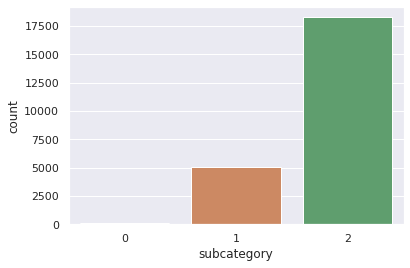

In [21]:
#frequency distribution of attack
sns.countplot(data['subcategory'])

In [22]:

data=data.drop(columns='pkSeqID')

In [23]:
#Categorical Encoding
data=pd.get_dummies(data)

In [24]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,subcategory,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,45115,3031,13913,0.0,100,0.000423,1,0.000423,100,0.000000,0.000000,0.000423,1,0,0,1,0
1,61890,9502,5431,0.0,98,0.000781,1,0.000781,100,0.000000,0.000000,0.000781,2,0,0,1,0
2,1822,916,3030,0.0,100,0.004917,1,0.004917,100,406.752075,203.376038,0.004917,2,0,0,1,0
3,33626,9000,4900,0.0,100,0.002834,1,0.002834,100,0.000000,0.000000,0.002834,2,0,0,1,0
4,1216,400,6924,0.0,100,0.005377,1,0.005377,100,185.977310,185.977310,0.005377,2,0,0,1,0


In [25]:
#Seperating the features and target variable
y=data['subcategory']
x=data.drop(columns='subcategory')

In [26]:
data.shape

(23419, 17)

In [27]:
x.shape

(23419, 16)

#

In [28]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [29]:
x.shape

(54709, 16)

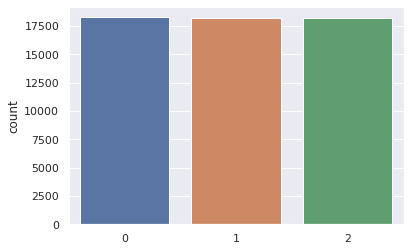

In [30]:
sns.countplot(y)

In [31]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 54.72%
Cross Validation Accuracy: 54.39% 


Text(0.5, 1.0, 'Naive Bayes Classifier')

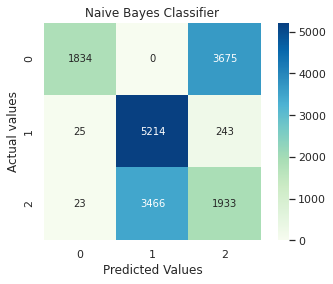

In [35]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Naive Bayes Classifier')

In [36]:
from sklearn.metrics import classification_report
print('Naive Bayes Classifier')
print(classification_report(y_test, y_pred))

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.97      0.33      0.50      5509
           1       0.60      0.95      0.74      5482
           2       0.33      0.36      0.34      5422

    accuracy                           0.55     16413
   macro avg       0.64      0.55      0.53     16413
weighted avg       0.64      0.55      0.53     16413



In [ ]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)

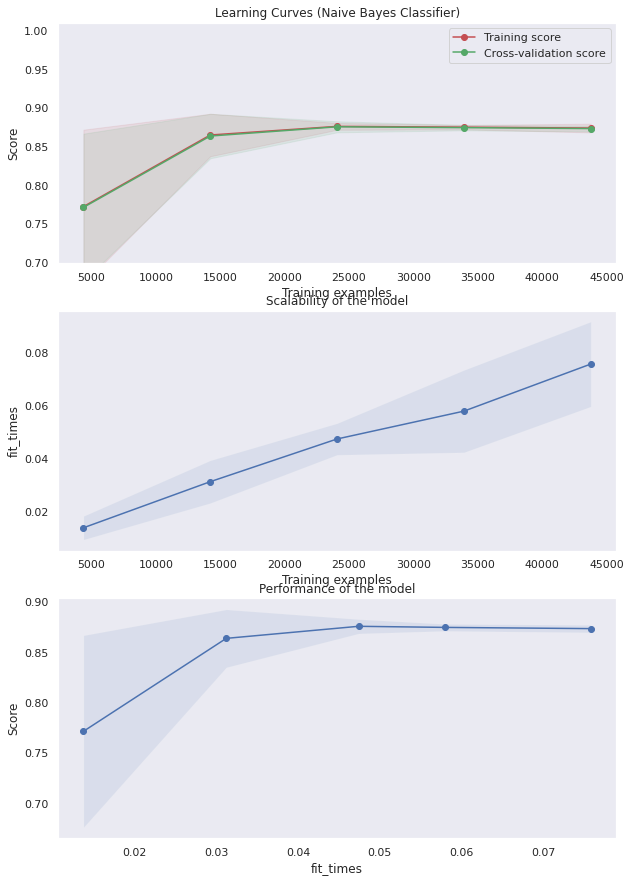

In [37]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Naive Bayes Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()